In [6]:
#Provide import statements for numpy, matplotlib.pyplot, pandas as pd, and curve_fit from scipy.optimize

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [3]:
#0. SPTID: the IAU designation for the SPT-detected source.
#1. RA: right ascension (J2000) in degrees.
#2. DEC: declination (J2000) in degrees.
#3. S/N(2.0 mm): detection significance (signal-to-noise ratio) in the 2.0 mm band.
#4. Sraw(2.0 mm): raw flux (uncorrected for flux boosting) in the 2.0 mm band.
#5. Sbest(2.0 mm): median value of de-boosted flux at 2.0 mm.
#6. dSup(2.0 mm): upper error bar (1-sigma normal equivalent) of de-boosted flux at 2.0 mm.
#7. dSdown(2.0 mm): lower error bar (1-sigma normal equivalent) of de-boosted flux at 2.0 mm.
#8. S/N(1.4 mm): detection significance (signal-to-noise ratio) in the 1.4 mm band.
#9. Sraw(1.4 mm): raw flux (uncorrected for flux boosting) in the 1.4 mm band.
#10. Sbest(1.4 mm): median value of de-boosted flux at 1.4 mm.
#11. dSup(1.4 mm): upper error bar (1-sigma normal equivalent) of de-boosted flux at 1.4 mm.
#12. dSdown(1.4 mm): lower error bar (1-sigma normal equivalent) of de-boosted flux at 1.4 mm.
#13. alpharaw: estimate (from the raw flux in each band) of the 2.0 mm-1.4 mm spectral index alpha
#14. alphabest: median value of spectral index.
#15. d_alphaup: upper error bar (1-sigma normal equivalent) of spectral index.
#16. d_alphadown (2.0 mm): lower error bar (1-sigma normal equivalent) of spectral index.
#17. P(alpha > 1.66): fraction of the spectral index posterior probability distribution above the threshold value of 1.66. A higher value of P means the source is more likely to be dust-dominated.
#18. Type: source classification (synchrotron- or dust-dominated).
#19. Nearest SUMSS source: angular distance (in arseconds) from the nearest source in the 36 cm (843 MHz) Sydney University Molongolo Sky Survey.
#20. Nearest RASS source: angular distance (in arseconds) from the nearest source in the ROSAT All-Sky Survey (RASS) Bright Source Catalog or Faint Source Catalog.
#21. Nearest IRAS source: angular distance (in arseconds) from the nearest source in the IRAS Faint-Source Catalog.


In [10]:
with open('source_table_vieira09_3sigma.dat','r') as f:
    df = pd.DataFrame(l.rstrip().split()[1:] for l in f)

new_header =  df.iloc[0] #grab the first row for the header
df =  df.iloc[1:]#take the data less the header row
df.columns = new_header #set the header row as the df header

df_rem = df

,SPTID,RA,DEC,S/N(2.0mm),S_raw_(2.0mm)_[mJy],S_best(2.0mm)[mJy],dS_up(2.0mm)[mJy],dS_down(2.0mm)[mJy],S/N(1.4mm),S_raw_(1.4mm)_[mJy],...,dS_down(1.4mm)[mJy],alpha_raw,alpha_best,d_alpha_up,d_alpha_down,P(alpha>1),Type,dR_SUMSS[arcsec],dR_RASS[arcsec],dR_IRAS[arcsec]
1,J045908-5857.1,74.787,-58.953,0.25,0.30,0.45,0.65,0.28,3.61,11.58,...,0.41,9.9,1.9,2.2,2.7,0.53,dust,352,636,281
2,J045909-5919.2,74.791,-59.321,0.00,-1.41,0.28,0.39,0.17,3.21,10.28,...,0.29,NaN,2.5,1.8,2.6,0.63,dust,293,801,738
3,J045911-5844.1,74.796,-58.737,0.00,-0.11,0.37,0.54,0.23,3.20,10.24,...,0.36,NaN,2.0,2.1,2.7,0.55,dust,291,1235,347
4,J045911-5722.1,74.798,-57.370,0.72,0.87,0.54,0.78,0.37,3.40,10.89,...,0.45,6.9,1.5,2.4,2.7,0.48,sync,170,231,430
5,J045913-5942.4,74.804,-59.708,6.20,7.51,7.26,1.27,1.27,7.05,22.58,...,4.02,3.0,2.9,0.7,0.7,0.95,dust,43,575,815
6,J045913-5537.5,74.805,-55.627,0.68,0.86,0.50,0.78,0.33,3.10,10.36,...,0.41,6.8,1.4,2.4,2.6,0.47,sync,213,259,1321
7,J045913-5826.5,74.806,-58.443,0.00,-1.27,0.28,0.39,0.18,3.24,10.37,...,0.31,NaN,2.5,1.8,2.6,0.63,dust,64,2138,727
8,J045914-5810.2,74.811,-58.170,0.00,-0.46,0.34,0.49,0.22,3.27,10.48,...,0.33,NaN,2.2,2.0,2.7,0.58,dust,591,1375,588
9,J045915-5748.6,74.815,-57.811,2.01,2.44,1.23,1.26,0.86,3.34,10.71,...,0.66,4.0,0.1,2.8,2.1,0.29,sync,419,247,95
10,J045918-5943.8,74.829,-59.731,3.07,3.71,0.27,0.32,0.14,0.00,-2.35,...,0.24,NaN,0.4,2.8,2.4,0.34,sync,79,596,730


In [23]:
# Use for loops and if statements to remove rows with:
# S/N(2.0mm) < 4.5 and S/N(1.4mm) < 4.5

for index, row in df_rem.iterrows():
    if float(row['S/N(2.0mm)']) < 4.5 and float(row['S/N(1.4mm)']) < 4.5:
        df_rem = df_rem.drop([index])
        
# All sources that made the flux cut
# Set a new array for sync sources
df_rem_all = df_rem
df_sync = df_rem

In [28]:
# Use for loops and if statements to remove rows with:
# SUMSS, RASS, IRAS, source within 60 arcseconds (df_rem)
#
# USe for loops and if statments to remove rows with:
# dust sources

for index, row in df_rem.iterrows():
    if float(row[19]) < 60 or float(row[20]) < 60 or float(row[21]) < 60:
        df_rem = df_rem.drop([index])

for index, row in df_sync.iterrows():
    if row['Type'] == 'dust':
        df_sync = df_sync.drop([index])

In [38]:
#Flux Cuts
sig_2 = 1.3
sig_1_4 = 3.4
snr_2 = []
snr_1_4 = []  #no counterpart
snr_s1_4 = [] #sync sources
snr_s2 =[]

### Add the SNR for each wavelength to arrays ###
for index, row in df_rem.iterrows():
    snr_2.append(float(row[3]))
    snr_1_4.append(float(row[8]))
    
for index, row in df_sync.iterrows():
    snr_s2.append(float(row[3]))
    snr_s1_4.append(float(row[8]))

    
### Convert all lists to numpy arrays
snr_2_arr = np.array(snr_2)
snr_1_4_arr = np.array(snr_1_4)
snr_s1_4_arr = np.array(snr_s1_4)
snr_s2_arr = np.array(snr_s2)

### You need flux and not SNR

flux_2 = snr_2_arr*sig_2
flux_1_4 = snr_1_4_arr*sig_1_4
flux_s1_4 = snr_s1_4_arr*sig_1_4
flux_s2 =snr_s2_arr*sig_2

In [39]:
def powerlaw(x, a, c):
    return c*x**a
fit, cov = curve_fit(powerlaw, flux_s2, flux_s1_4) #(func, x, y)

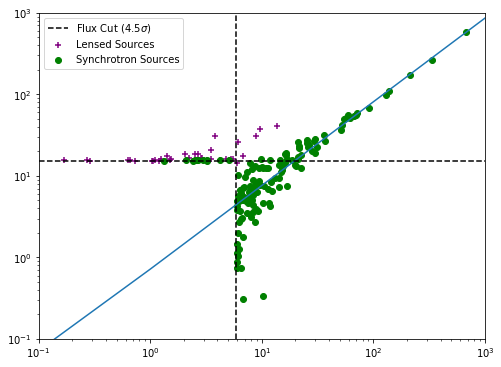

In [41]:
#Use scatter plots to plot the 1.4 mm flux versus the 2.0 mm flux for all sync sources above flux cut
# Scatter plot only the ones above cut and that have no counterpart
# Plot best fit line using plot
# Look how to set up a legend, use different colors and markers
# Add some labels

fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(flux_2, flux_1_4, color = 'purple', marker = '+', label = "Lensed Sources")
plt.scatter(flux_s2, flux_s1_4, color = 'green', marker = 'o', label = 'Synchrotron Sources')
plt.plot(range(0,1000), powerlaw(range(0,1000),*fit))

ax.set_yscale('log') # Here is how you change to log space
ax.set_xscale('log')
plt.xlim(.1,1000)    # here is how you set axes limits
plt.ylim(.1,1000)
ax.axvline(4.5*sig_2, ls = '--', c = 'k', label =r'Flux Cut (4.5$\sigma$)')  # here is how you draw horizontal and vertical lines
ax.axhline(4.5*sig_1_4, ls = '--', c = 'k')
plt.legend()
